C:\Users\user\AppData\Local\Temp\ipykernel_1140\3930834007.py:20: RuntimeWarning: divide by zero encountered in log
  return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\user\AppData\Local\Temp\ipykernel_1140\3930834007.py:20: RuntimeWarning: invalid value encountered in multiply
  return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


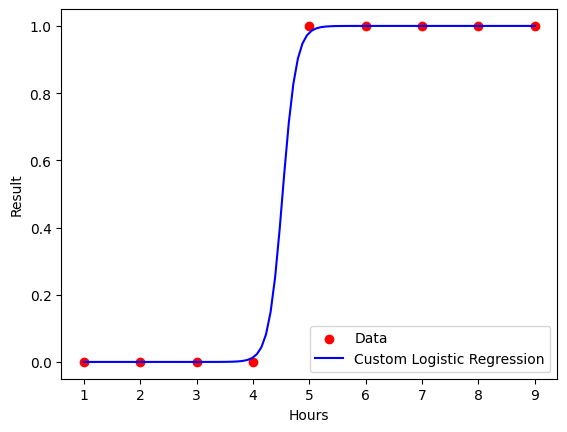

Prediction for 8.0 hours (Custom): [ True]
Prediction for 8.0 hours (Sklearn): [1]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.optimize import minimize

# Load dataset
data = pd.read_csv("logistic.csv")
X = data["hours"].values.reshape(-1, 1)
y = data["result"].values

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradient function
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (1 / m) * X.T @ (h - y)

# Adding bias term
X_bias = np.c_[np.ones((X.shape[0], 1)), X]
initial_theta = np.zeros(X_bias.shape[1])

# Optimize parameters
result = minimize(fun=cost_function, x0=initial_theta, args=(X_bias, y), jac=gradient, method='TNC')
optimal_theta = result.x

# Predict function
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

# Predictions using self-defined function
predictions_custom = predict(X_bias, optimal_theta)

# Logistic Regression using sklearn
model = LogisticRegression()
model.fit(X, y)
predictions_sklearn = model.predict(X)

# Plot the data and decision boundary
plt.scatter(X, y, color='red', label='Data')
x_values = np.linspace(min(X), max(X), 100)
y_values = sigmoid(optimal_theta[0] + optimal_theta[1] * x_values)
plt.plot(x_values, y_values, label='Custom Logistic Regression', color='blue')
plt.xlabel("Hours")
plt.ylabel("Result")
plt.legend()
plt.show()

# Function to predict new values
def predict_new_value(hours):
    hours_array = np.array([[1, hours]])  # Adding bias term
    custom_prediction = predict(hours_array, optimal_theta)
    sklearn_prediction = model.predict([[hours]])
    return custom_prediction, sklearn_prediction

# Example of predicting a new value
new_hours = float(input("ENter Value to predict - "))
custom_pred, sklearn_pred = predict_new_value(new_hours)
print(f"Prediction for {new_hours} hours (Custom):", custom_pred)
print(f"Prediction for {new_hours} hours (Sklearn):", sklearn_pred)
